<a href="https://colab.research.google.com/github/Lis30/Homeworks/blob/main/%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0_5_2_%D0%9A%D0%B0%D1%80%D0%BF%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Имеются следующие данные:<br>
<br>
date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)<br>
name – имя пользователя<br>
transaction – статус транзакции<br>
minute* – сколько минут прошло с начала дня<br>
<br>
*Доступна в данных с 5 шага.

Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [2]:
df = pd.read_csv('transaction_data.csv')

In [3]:
df.info() #размер таблицы, типы переменных, число пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [4]:
df.head(3) #сами данные

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull


In [5]:
df.describe() #описательные статистики

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

In [7]:
df.transaction.value_counts() #значения находятся в колонке transaction, cколько наблюдений относятся к тому или иному уровню

transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

<Axes: xlabel='transaction', ylabel='count'>

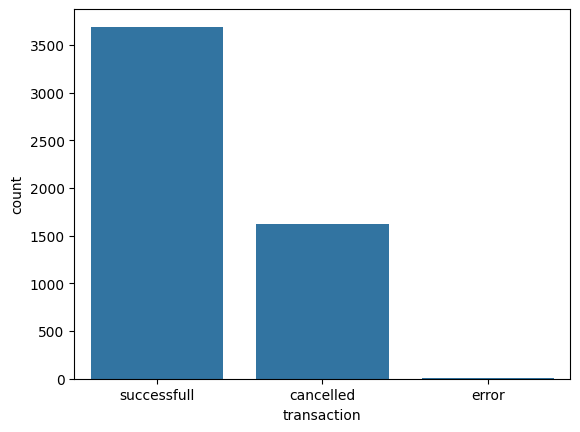

In [8]:
tsct = df.transaction.value_counts()
sns.barplot(x=tsct.index, y = tsct) #построили диаграмму

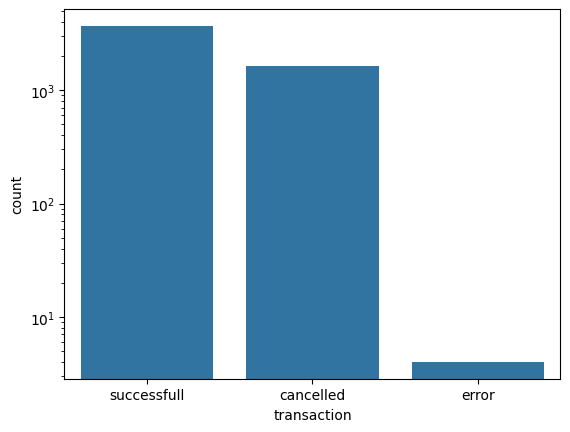

In [13]:
sns.barplot(x=tsct.index, y = tsct)
plt.yscale('log') #чтобы были видны значения 'error' взяли логарифмическую шкалу по Х

Сколько транзакций завершились ошибкой?

In [12]:
df.query('transaction == "error"').agg({'name': 'count'})

name    4
dtype: int64

Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.<br>
* по оси х - число транзакций
* по оси у - доля пользователей с таким числом транзакций

In [22]:
df.query('transaction == "successfull"').groupby('name').transaction.count().head(3)
#Сколько успешных транзакций осуществил каждый из пользователей. оставила только "голову", т.к. таблица большая

name
Ekaterina_Fedorova    72
Ekaterina_Ivanova     59
Ekaterina_Lesnova     63
Name: transaction, dtype: int64

In [23]:
tr_user = df.query('transaction == "successfull"').groupby('name').transaction.count()

<Axes: xlabel='transaction', ylabel='Count'>

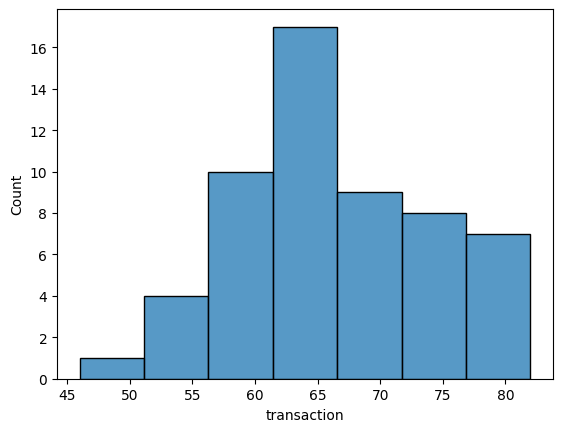

In [30]:
sns.histplot(tr_user)

Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)<br>
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [31]:
df_updated = pd.read_csv('transaction_data_updated.csv') #загрузили обновлённые данные

In [35]:
user_vs_minute_pivot = pd.pivot_table(df_updated, values='transaction', index='minute',
               columns='name', aggfunc='count') #построили сводную с требуемыми столбцами и колонками

In [38]:
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0) #заменяем Наны на нули

In [40]:
user_vs_minute_pivot.head(5)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


Постройте график, где:
* по оси х - минута транзакции
* по оси у - число транзакций

<Axes: xlabel='minute'>

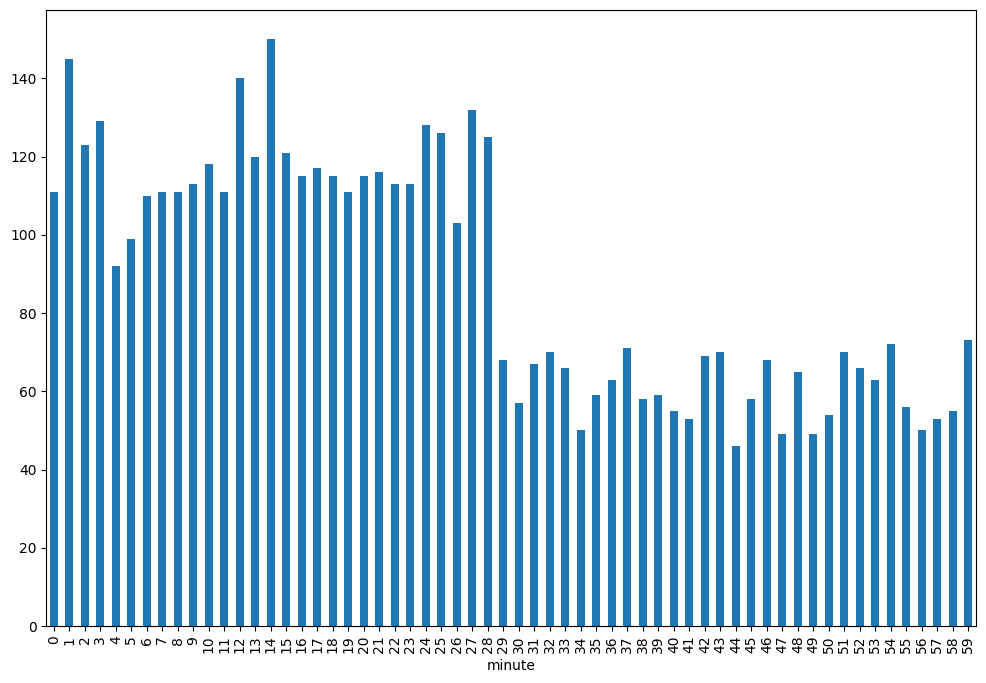

In [45]:
user_vs_minute_pivot.sum(axis=True).plot.bar(figsize = (12, 8)) #строим график

Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.<br>
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [47]:
df_updated #ошибка в выдаче минут с начала дня - час ночи не переводится в 60 минут, а записывается только минутная часть времени

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [48]:
df_updated['date'] = pd.to_datetime(df_updated.date) #перевели колонку с датой в формат даты

In [50]:
df_updated['true_minute'] = df_updated.date.dt.minute + 60*df_updated.date.dt.hour #сохранили верное число минут в новой колонке

In [51]:
df_updated.head(5)

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [52]:
user_vs_minute = pd.pivot_table(df_updated, values='transaction', index='true_minute',
               columns='name', aggfunc='count')

<Axes: xlabel='true_minute'>

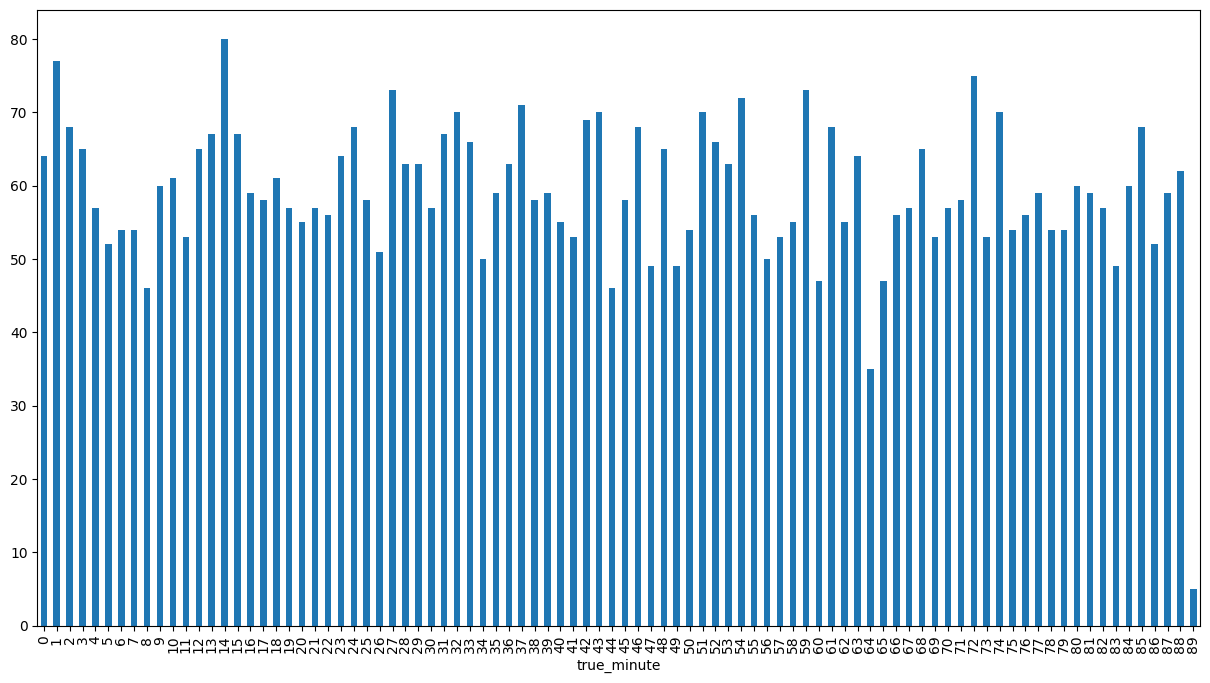

In [54]:
user_vs_minute.sum(axis=True).plot.bar(figsize = (15, 8)) #строим верный график